# **EN3160 Assignment 3 on Neural Networks**
### Morawakgoda M.K.I.G.

## **Q01**


### Using Mean Squared Error Loss

100%|██████████| 170M/170M [00:05<00:00, 30.7MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/20, Loss: 0.9769653241038323
Epoch 2/20, Loss: 0.9498501802086831
Epoch 3/20, Loss: 0.9361049099564552
Epoch 4/20, Loss: 0.9275478853583335
Epoch 5/20, Loss: 0.9216107125282288
Epoch 6/20, Loss: 0.9172075136303902
Epoch 7/20, Loss: 0.9137946794629097
Epoch 8/20, Loss: 0.911066599547863
Epoch 9/20, Loss: 0.908837557733059
Epoch 10/20, Loss: 0.9069844413399696
Epoch 11/20, Loss: 0.9054243712425232
Epoch 12/20, Loss: 0.9040968613624573
Epoch 13/20, Loss: 0.9029580656290054
Epoch 14/20, Loss: 0.9019747343659401
Epoch 15/20, Loss: 0.9011205071806908
Epoch 16/20, Loss: 0.9003754766583443
Epoch 17/20, Loss: 0.8997228778004647
Epoch 18/20, Loss: 0.8991492399573326
Epoch 19/20, Loss: 0.898643792450428
Epoch 20/20, Loss: 0.8981972764134407


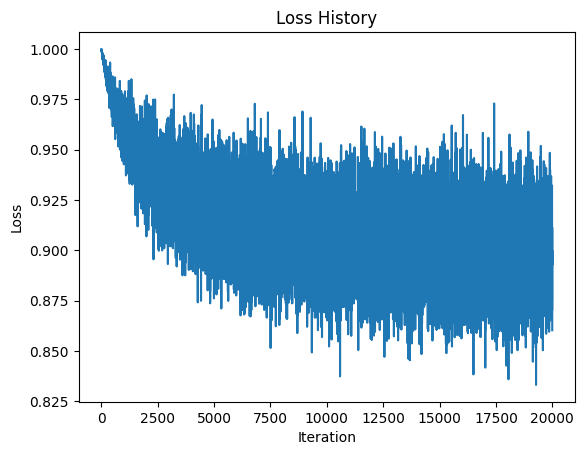

Training accuracy: 32.22%
Test accuracy: 32.44%


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 50

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w = torch.randn(Din, K) * std  # One layer: directly map input to output
b = torch.zeros(K)

# Hyperparameters
iterations = 20
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot encoding

        # Forward pass
        y_pred = x_train.mm(w) + b  # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w ** 2)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w -= lr * dw
        b -= lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_pred = x_train.mm(w) + b
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_pred = x_test.mm(w) + b
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


### Using Cross-Entropy Loss

100%|██████████| 170M/170M [00:05<00:00, 30.0MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/10, Loss: 2.302736178636551
Epoch 2/10, Loss: 2.3027526104450224
Epoch 3/10, Loss: 2.302741094827652
Epoch 4/10, Loss: 2.3027147145271303
Epoch 5/10, Loss: 2.3027236640453337
Epoch 6/10, Loss: 2.3027041845321654
Epoch 7/10, Loss: 2.302691547870636
Epoch 8/10, Loss: 2.3026857001781464
Epoch 9/10, Loss: 2.3026685938835145
Epoch 10/10, Loss: 2.30266263127327


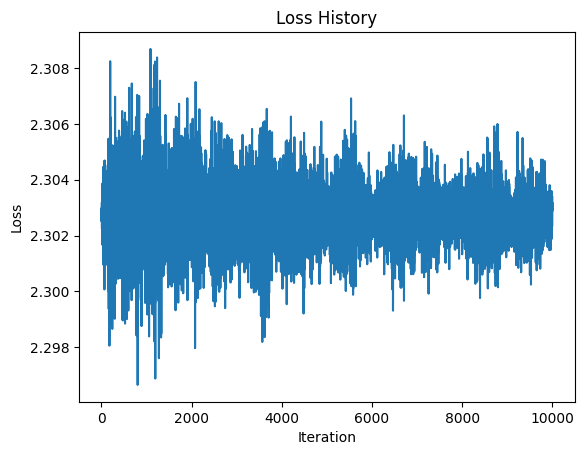

Training accuracy: 10.00%
Test accuracy: 10.00%


In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100  # Number of nodes in the hidden layer
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases for two layers
w1 = torch.randn(Din, H) * std  # Input to hidden layer
b1 = torch.zeros(H)
w2 = torch.randn(H, K) * std  # Hidden to output layer
b2 = torch.zeros(K)

# Hyperparameters
epochs = 10
lr = 1e-3  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 1e-3  # Regularization strength
loss_history = []

# 3. Training Loop
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        h = torch.sigmoid(x_train.mm(w1) + b1)  # Hidden layer activation
        y_pred = h.mm(w2) + b2  # Output layer activation (logits)

        # Loss calculation (Cross-Entropy Loss with regularization)
        log_probs = nn.functional.log_softmax(y_pred, dim=1)  # Apply log-softmax to predictions
        loss = -torch.sum(log_probs[range(Ntr), labels]) / Ntr  # Cross-entropy for the batch
        loss += reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))  # Add regularization term
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        grad_y_pred = nn.functional.softmax(y_pred, dim=1)  # Softmax output for gradients
        grad_y_pred[range(Ntr), labels] -= 1
        grad_y_pred /= Ntr

        dw2 = h.t().mm(grad_y_pred) + reg * w2
        db2 = grad_y_pred.sum(dim=0)
        dh = grad_y_pred.mm(w2.t()) * h * (1 - h)  # Derivative of sigmoid

        dw1 = x_train.t().mm(dh) + reg * w1
        db1 = dh.sum(dim=0)

        # Parameter updates
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    # Print loss for each epoch
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        h = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = h.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        h = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = h.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


## **Q02**
###  LeNet-5 network for MNIST

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Load and transform MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# 2. Define the LeNet-5 Model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.tanh(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.tanh(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 16 * 5 * 5)  # Flatten
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

# 3. Initialize network, loss function, and optimizer
model = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Training Loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        # Optimize
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(trainloader)}")

# 5. Calculate Training and Test Accuracies
def calculate_accuracy(loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            inputs, labels = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

train_acc = calculate_accuracy(trainloader)
test_acc = calculate_accuracy(testloader)

print(f"Training accuracy: {train_acc:.2f}%")
print(f"Test accuracy: {test_acc:.2f}%")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.3MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 495kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.52MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.53MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/10, Loss: 0.22445708625852617
Epoch 2/10, Loss: 0.06434988899470202
Epoch 3/10, Loss: 0.04724419303325269
Epoch 4/10, Loss: 0.03415712856810226
Epoch 5/10, Loss: 0.026264998645557446
Epoch 6/10, Loss: 0.021249568598818526
Epoch 7/10, Loss: 0.016966791312048424
Epoch 8/10, Loss: 0.01448807909887141
Epoch 9/10, Loss: 0.011746238434494514
Epoch 10/10, Loss: 0.012382745428581976
Training accuracy: 99.69%
Test accuracy: 98.67%


## **Q03**

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import os
import time
from PIL import Image
from tempfile import TemporaryDirectory
plt.ion() #interative mode

In [13]:
# Training includes random resizing and flipping, while validation is only normalized
transformations = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load Dataset
data_directory = '/content/hymenoptera_data'
datasets_dict = {split: datasets.ImageFolder(os.path.join(data_directory, split), transformations[split])
                 for split in ['train', 'val']}
loaders = {split: torch.utils.data.DataLoader(datasets_dict[split], batch_size=4, shuffle=True, num_workers=4)
           for split in ['train', 'val']}
dataset_lengths = {split: len(datasets_dict[split]) for split in ['train', 'val']}
class_labels = datasets_dict['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Training Function
def model_trainer(model, loss_func, optimizer, sched, epochs=25):
    start_time = time.time()

    # Temporary directory to store the best model weights
    with TemporaryDirectory() as temp_dir:
        best_model_path = os.path.join(temp_dir, 'best_model_weights.pt')
        torch.save(model.state_dict(), best_model_path)
        highest_accuracy = 0.0

        for epoch in range(epochs):
            print(f'Epoch {epoch + 1}/{epochs}')
            print('-' * 10)

            # Training and validation phases
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluation mode

                epoch_loss = 0.0
                correct_predictions = 0

                # Iterate through data
                for batch_features, batch_labels in loaders[phase]:
                    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

                    # Reset gradients
                    optimizer.zero_grad()

                    # Forward pass
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(batch_features)
                        _, predictions = torch.max(outputs, 1)
                        loss = loss_func(outputs, batch_labels)

                        # Backward pass and optimization (only in training phase)
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # Update loss and correct predictions
                    epoch_loss += loss.item() * batch_features.size(0)
                    correct_predictions += torch.sum(predictions == batch_labels.data)

                if phase == 'train':
                    sched.step()

                # Calculate epoch loss and accuracy
                avg_loss = epoch_loss / dataset_lengths[phase]
                accuracy = correct_predictions.double() / dataset_lengths[phase]

                print(f'{phase.capitalize()} Loss: {avg_loss:.4f} | Accuracy: {accuracy:.4f}')

                # Save the model if validation accuracy is the best
                if phase == 'val' and accuracy > highest_accuracy:
                    highest_accuracy = accuracy
                    torch.save(model.state_dict(), best_model_path)
            print()

        # Training time report
        total_time = time.time() - start_time
        print(f'Training complete in {total_time // 60:.0f}m {total_time % 60:.0f}s')
        print(f'Best Validation Accuracy: {highest_accuracy:.4f}')

        # Load the best model weights
        model.load_state_dict(torch.load(best_model_path, weights_only=True))

    return model


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


### a) Fine Tuning

In [15]:
# Load and Configure Pre-trained Model
model_resnet18 = models.resnet18(weights='IMAGENET1K_V1')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Modify the final fully connected layer for binary classification
in_features = model_resnet18.fc.in_features
model_resnet18.fc = nn.Linear(in_features, 2)
model_resnet18 = model_resnet18.to(device)

# Define Loss Function and Optimizer
loss_criteria = nn.CrossEntropyLoss()
optim_func = optim.SGD(model_resnet18.parameters(), lr=0.001, momentum=0.9)
learning_scheduler = lr_scheduler.StepLR(optim_func, step_size=7, gamma=0.1)

# Train the Model
model_resnet18 = model_trainer(model_resnet18, loss_criteria, optim_func, learning_scheduler, epochs=20)

Epoch 1/20
----------
Train Loss: 0.6367 | Accuracy: 0.6721
Val Loss: 0.2125 | Accuracy: 0.9085

Epoch 2/20
----------
Train Loss: 0.5493 | Accuracy: 0.7541
Val Loss: 0.3878 | Accuracy: 0.8824

Epoch 3/20
----------
Train Loss: 0.5829 | Accuracy: 0.7746
Val Loss: 0.2861 | Accuracy: 0.8824

Epoch 4/20
----------
Train Loss: 0.4042 | Accuracy: 0.8197
Val Loss: 0.5360 | Accuracy: 0.8301

Epoch 5/20
----------
Train Loss: 0.4223 | Accuracy: 0.8279
Val Loss: 0.2480 | Accuracy: 0.9020

Epoch 6/20
----------
Train Loss: 0.4813 | Accuracy: 0.7992
Val Loss: 0.3179 | Accuracy: 0.8758

Epoch 7/20
----------
Train Loss: 0.5771 | Accuracy: 0.7828
Val Loss: 0.5997 | Accuracy: 0.8105

Epoch 8/20
----------
Train Loss: 0.3704 | Accuracy: 0.8525
Val Loss: 0.2466 | Accuracy: 0.9281

Epoch 9/20
----------
Train Loss: 0.3759 | Accuracy: 0.8279
Val Loss: 0.2177 | Accuracy: 0.9412

Epoch 10/20
----------
Train Loss: 0.3217 | Accuracy: 0.8689
Val Loss: 0.2096 | Accuracy: 0.9281

Epoch 11/20
----------
Train 

### b)Using the network as a feature extracter.

In [17]:
# Load Pre-trained ResNet18 Model
frozen_resnet18 = torchvision.models.resnet18(weights='IMAGENET1K_V1')

# Freeze all layers except the final fully connected layer
for param in frozen_resnet18.parameters():
    param.requires_grad = False

# Adjust the final layer for binary classification
input_features = frozen_resnet18.fc.in_features
frozen_resnet18.fc = nn.Linear(input_features, 2)
frozen_resnet18 = frozen_resnet18.to(device)

# Define Loss Function and Optimizer for the Final Layer
loss_function = nn.CrossEntropyLoss()
# Only the parameters of the final layer are optimized
final_optimizer = optim.SGD(frozen_resnet18.fc.parameters(), lr=0.001, momentum=0.9)

# Learning Rate Scheduler: Reduce LR by 0.1 every 7 epochs
lr_scheduler_exp = lr_scheduler.StepLR(final_optimizer, step_size=7, gamma=0.1)

# Train the Model
frozen_resnet18 = model_trainer(frozen_resnet18, loss_function, final_optimizer, lr_scheduler_exp, epochs=20)


Epoch 1/20
----------
Train Loss: 0.5679 | Accuracy: 0.6803
Val Loss: 0.4302 | Accuracy: 0.7712

Epoch 2/20
----------
Train Loss: 0.4424 | Accuracy: 0.7951
Val Loss: 0.2031 | Accuracy: 0.9281

Epoch 3/20
----------
Train Loss: 0.6350 | Accuracy: 0.7828
Val Loss: 0.3116 | Accuracy: 0.8627

Epoch 4/20
----------
Train Loss: 0.4254 | Accuracy: 0.8197
Val Loss: 0.1625 | Accuracy: 0.9477

Epoch 5/20
----------
Train Loss: 0.5381 | Accuracy: 0.7664
Val Loss: 0.2659 | Accuracy: 0.9085

Epoch 6/20
----------
Train Loss: 0.5224 | Accuracy: 0.7951
Val Loss: 0.8591 | Accuracy: 0.7190

Epoch 7/20
----------
Train Loss: 0.6327 | Accuracy: 0.7582
Val Loss: 0.1641 | Accuracy: 0.9477

Epoch 8/20
----------
Train Loss: 0.2866 | Accuracy: 0.8770
Val Loss: 0.1715 | Accuracy: 0.9412

Epoch 9/20
----------
Train Loss: 0.3112 | Accuracy: 0.8566
Val Loss: 0.1605 | Accuracy: 0.9477

Epoch 10/20
----------
Train Loss: 0.2393 | Accuracy: 0.8934
Val Loss: 0.1670 | Accuracy: 0.9542

Epoch 11/20
----------
Train 